#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/Colab Notebooks/Darknet'

total 12
drwx------ 2 root root 4096 Jun  3 07:29 cfg
drwx------ 2 root root 4096 Jun  3 07:28 data
drwx------ 2 root root 4096 Jun  3 07:23 weights


In [3]:
weight_file = '/gdrive/My Drive/Colab Notebooks/Darknet/weights/yolov3.weights'
cfg_file = '/gdrive/My Drive/Colab Notebooks/Darknet/cfg/yolov3.cfg'
name_file = '/gdrive/My Drive/Colab Notebooks/Darknet/data/coco.names'

#2. Load File

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
min_confidence = 0.5

In [6]:
# load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [7]:
classes = []
with open(name_file, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0,255,size=(len(classes),3))

In [9]:
from google.colab import files
files.upload()

Saving car1.jpg to car1.jpg


{'car1.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x10\x10\x13\x10\x13\x16\x16\x16\x16\x16\x16\x1a\x18\x1a\x1b\x1b\x1b\x1a\x1a\x1a\x1a\x1b\x1b\x1b\x1d\x1d\x1d"""\x1d\x1d\x1d\x1b\x1b\x1d\x1d  ""%&%##"#&&(((00..88:EES\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7

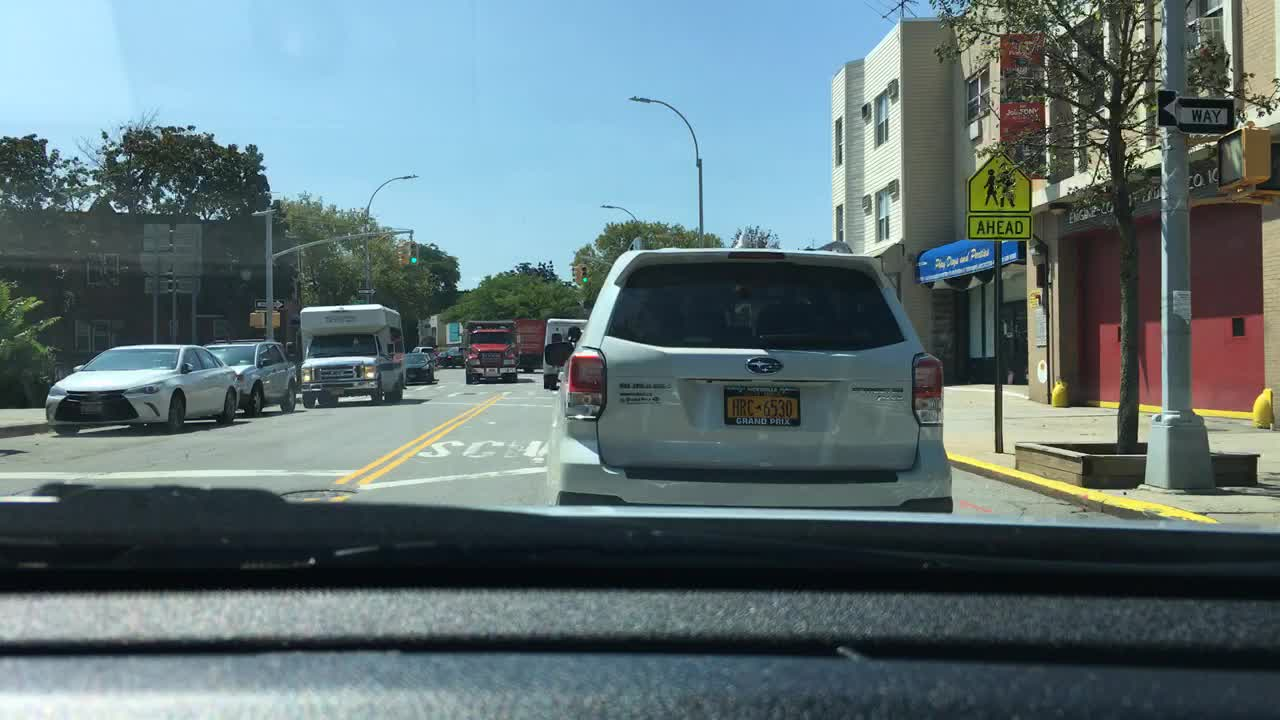

720 1280


In [28]:
img = cv2.imread('car1.jpg')
height, width, channels = img.shape
cv2_imshow(img)

In [29]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers) 

0 car
1 truck
2 car
3 car
4 traffic light
5 car
6 truck
7 truck


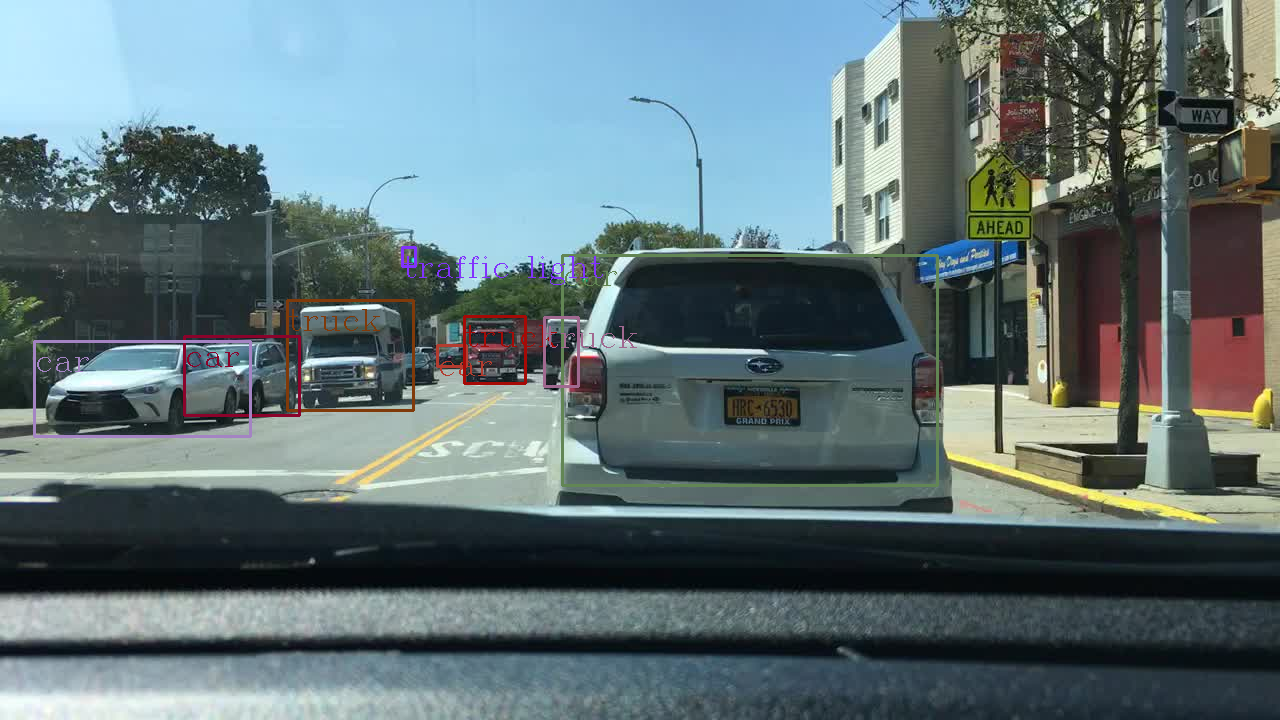

In [30]:
class_ids = []
confidences = []
boxes = []

for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > min_confidence:
      # object detect
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      # rectangle coordinates
      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    print(i, label)
    color = colors[i]
    cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
    cv2.putText(img, label, (x,y+30), font, 1, color, 1)

cv2_imshow(img)